In [64]:
relation_class = ['no_relation', 'org:top_members/employees', 'org:members',
        'org:product', 'per:title', 'org:alternate_names',
        'per:employee_of', 'org:place_of_headquarters', 'per:product',
        'org:number_of_employees/members', 'per:children',
        'per:place_of_residence', 'per:alternate_names',
        'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
        'per:spouse', 'org:founded', 'org:political/religious_affiliation',
        'org:member_of', 'per:parents', 'org:dissolved',
        'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
        'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
        'per:religion']

type_class = ['ORG/ORG','ORG/PER','ORG/DAT','ORG/LOC','ORG/POH','ORG/NOH',
              'PER/ORG','PER/PER','PER/DAT','PER/LOC','PER/POH','PER/NOH']

from tqdm.notebook import tqdm
# relation_book[relation_class][type_class][random]
relation_book = []

df = df_vanila_temp

for _, relation_name in tqdm(enumerate(relation_class)) :
    temp_list = []
    temp_df = df[df['label'] == str(relation_name) ][['subject_entity','object_entity','subject_type','object_type', 'label']]
    
    for _ , type_name in enumerate(type_class) : 
        temp_list2 = []
        temp_df2 = temp_df[temp_df['subject_type'] + '/' + temp_df['object_type'] == str(type_name)][['subject_entity','object_entity']]
        temp_df2_idx_list = list(temp_df2.index)
        
        for i in temp_df2_idx_list : 
            temp_list3 = []
            temp_list3.append(temp_df2['subject_entity'][i])
            temp_list3.append(temp_df2['object_entity'][i])
            
            temp_list2.append(temp_list3)
        
        temp_list.append(temp_list2)
        
    relation_book.append(temp_list)

In [66]:
import pandas as pd
vanila_dataset = pd.read_csv("/opt/ml/dataset/train/dup_clean_train.csv", index_col = 0, encoding = 'utf-8')
vanila_dataset['id'] = [i for i in range(len(vanila_dataset))]
vanila_dataset.reset_index(drop=False, inplace=True)
vanila_dataset

data= vanila_dataset

sub_entity, sub_type= [], []
obj_entity, obj_type= [], []
sub_idx, obj_idx= [], []
sentence= []

"""preprocess"""
for i, [x, y, z] in enumerate(zip(data['subject_entity'], data['object_entity'], data['sentence'])):
    sub_typ= x[1:-1].split(':')[-1].split('\'')[-2]
    obj_typ= y[1:-1].split(':')[-1].split('\'')[-2]
            
    for idx_i in range(len(x)):
        if x[idx_i: idx_i+ 9]== 'start_idx':
            sub_start= int(x[idx_i+12:].split(',')[0].strip())
        if x[idx_i: idx_i+7]== 'end_idx':
            sub_end= int(x[idx_i+10:].split(',')[0].strip())
                
        if y[idx_i: idx_i+ 9]== 'start_idx':
            obj_start= int(y[idx_i+12:].split(',')[0].strip())
        if y[idx_i: idx_i+7]== 'end_idx':
            obj_end= int(y[idx_i+10:].split(',')[0].strip())

    sub_i= [sub_start, sub_end]
    obj_i= [obj_start, obj_end]

    sub_entity.append(z[sub_i[0]: sub_i[1]+1])
    obj_entity.append(z[obj_i[0]: obj_i[1]+1])
    sub_type.append(sub_typ); sub_idx.append(sub_i)
    obj_type.append(obj_typ); obj_idx.append(obj_i)
        
    sentence.append(z)
df_vanila_temp = pd.DataFrame({'id': data['id'], 'sentence' : sentence, 'subject_entity': sub_entity, 'object_entity': obj_entity,
                        'subject_type': sub_type, 'object_type': obj_type, 'label': data['label'],
                        'subject_idx': sub_idx, 'object_idx': obj_idx})

In [35]:
df_vanila_temp

,id,sentence,subject_entity,object_entity,subject_type,object_type,label,subject_idx,object_idx
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,ORG,PER,no_relation,"[24, 26]","[13, 18]"
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,ORG,ORG,no_relation,"[19, 23]","[14, 17]"
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,ORG,ORG,org:member_of,"[21, 24]","[34, 41]"
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,ORG,PER,org:top_members/employees,"[13, 17]","[22, 24]"
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,ORG,DAT,no_relation,"[22, 30]","[0, 3]"
...,...,...,...,...,...,...,...,...,...
32459,32459,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,유기준,부산 서구·동구,PER,LOC,per:employee_of,"[93, 95]","[100, 107]"
32460,32460,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",최시형,손병희,PER,PER,per:colleagues,"[7, 9]","[17, 19]"
32461,32461,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,완도군,신우철,ORG,PER,org:top_members/employees,"[0, 2]","[7, 9]"
32462,32462,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",JTBC,중앙홀딩스,ORG,ORG,no_relation,"[6, 9]","[21, 25]"


In [67]:
df_vanila = copy.copy(df_vanila_temp)

bad_sentence = []
label_list = ['per:spouse','per:parents','per:colleagues','org:founded','per:date_of_death',
              'org:members','org:product','per:children','per:place_of_residence','per:other_family',
              'per:place_of_birth','org:founded_by','per:product','per:siblings','per:religion',
              'org:political/religious_affiliation','per:schools_attended','org:dissolved',
              'org:number_of_employees/members','per:place_of_death']

# 몇배 증강 필요한지
need_times = [2,4,5,6,7,7,8,11,19,20,23,25,28,29,42,43,51,64,90,108]

df_list = []

from tqdm.notebook import tqdm

for i in tqdm(range(len(label_list))) : 
    temp_list = []
    temp_df = pd.DataFrame()
    
    # 각각의 label에 해당하는 값 넣어줌
    for j in range(len(df_vanila)) :
        if df_vanila['label'][j] == label_list[i] :
            temp_list.append(j)
    
    # 필요한 배수만큼 반복해서 넣어줌
    for times in range(need_times[i]) :
        for idx in temp_list :
            temp_df = temp_df.append(df_vanila.iloc[idx],ignore_index=True)
    
    # df리스트에 포함시키기
    df_list.append(temp_df)           

In [69]:

# label, subject_type, object_type이 모두 같아야만 치환 가능
# 문장 데이터 교체 자동화가 필요함!!
import random
from tqdm.notebook import tqdm
import copy

modified_df_list = []

for df in tqdm(df_list) : 
    modified_df = pd.DataFrame()
    modified_df = copy.copy(df)
    for i in range(len(df)) : 
        temp_list = []
        relation_num = relation_class.index(df['label'][i])
        type_num = type_class.index((df['subject_type'][i]+'/' + df['object_type'][i]))

        temp_list = relation_book[relation_num][type_num]
        random_entity = temp_list[random.randint(0, len(temp_list)-1)]

        # index 설정
        sub_idx = df['subject_idx'][i]    
        obj_idx = df['object_idx'][i]

        # sub가 먼저 나올 경우
        if min(sub_idx[0],obj_idx[0]) == sub_idx[0] :
            temp_len = len(df['sentence'][i][sub_idx[1]+1:obj_idx[0]])

            modified_sentence = df['sentence'][i][:sub_idx[0]] + random_entity[0] + df['sentence'][i][sub_idx[1]+1:obj_idx[0]] + random_entity[1] + df['sentence'][i][obj_idx[1]+1:]

            modified_df['subject_idx'][i][0] = len(df['sentence'][i][:sub_idx[0]])
            modified_df['subject_idx'][i][1] = len(df['sentence'][i][:sub_idx[0]] + random_entity[0]) -1
            modified_df['object_idx'][i][0] = modified_df['subject_idx'][i][1] + temp_len + 1
            modified_df['object_idx'][i][1] = modified_df['object_idx'][i][0] + len(random_entity[1]) -1

        # obj가 먼저 나올 경우
        else :
            temp_len = len(df['sentence'][i][obj_idx[1]+1:sub_idx[0]])

            modified_sentence = df['sentence'][i][:obj_idx[0]] + random_entity[1] + df['sentence'][i][obj_idx[1]+1:sub_idx[0]] + random_entity[0] + df['sentence'][i][sub_idx[1]+1:]

            modified_df['object_idx'][i][0] = len(df['sentence'][i][:obj_idx[0]]) 
            modified_df['object_idx'][i][1] = len(df['sentence'][i][:obj_idx[0]] + random_entity[1]) -1
            modified_df['subject_idx'][i][0] = modified_df['object_idx'][i][1] + temp_len + 1
            modified_df['subject_idx'][i][1] = modified_df['subject_idx'][i][0] + len(random_entity[0]) -1


        # 갈아끼우기
        modified_df['sentence'][i] = modified_sentence
        modified_df['subject_entity'][i] = random_entity[0]
        modified_df['object_entity'][i] = random_entity[1]

    # 문장 앞 뒤 잘라내기
    for i in range(len(modified_df)) : 
        start_cut = min(modified_df['subject_idx'][i][0], modified_df['object_idx'][i][0])
        end_cut = max(modified_df['subject_idx'][i][1], modified_df['object_idx'][i][1])
        modified_df['sentence'][i] = modified_df['sentence'][i][start_cut:end_cut+1]

    modified_df_list.append(modified_df)

<ipython-input-69-05398083ddc5>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['sentence'][i] = modified_sentence
<ipython-input-69-05398083ddc5>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['subject_entity'][i] = random_entity[0]
<ipython-input-69-05398083ddc5>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['object_entity'][i] = random_entity[1]


<ipython-input-69-05398083ddc5>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['sentence'][i] = modified_df['sentence'][i][start_cut:end_cut+1]


In [94]:
df_list[1]

,id,label,object_entity,object_idx,object_type,sentence,subject_entity,subject_idx,subject_type
0,146.0,per:parents,고시라카와 천황,"[64, 67]",PER,후지와라노 쇼시/다마코(1101년 - 1145년 9월 10일)은 헤이안 시대 도바 ...,다카쿠라 천황,"[81, 84]",PER
1,219.0,per:parents,어머니 장수금,"[37, 39]",POH,김대중은 1924년 1월 6일에 전라남도 신안에서 아버지 김운식과 어머니 장수금 사...,김대중,"[0, 2]",PER
2,229.0,per:parents,문무왕,"[6, 11]",PER,자의왕후는 문무왕과의 사이에서 소명태자와 훗날 신문왕이 되는 정명태자를 낳았다.,신문왕,"[29, 35]",PER
3,475.0,per:parents,타흐마스프 1세,"[26, 29]",PER,"후일 이스마일 2세라 알려질 이스마일 미르자는 밤, 타흐마스프 1세의 둘째 아들로 ...",이스마일 2세,"[3, 6]",PER
4,528.0,per:parents,송갑조,"[30, 37]",PER,"송갑조, 김장생의 문인으로 그 뒤로 송시열은 아버지 송갑조, 사계 김장생, 김장생의...",송시열,"[20, 23]",PER
...,...,...,...,...,...,...,...,...,...
2075,32194.0,per:parents,페르난도 1세,"[0, 5]",PER,페르난도 1세는 죽을 때 여러 자식들에게 왕국을 나누어주면서 둘째 아들 알폰소 6세...,알폰소 6세,"[39, 42]",PER
2076,32196.0,per:parents,루이 14세,"[6, 10]",PER,1714년 루이 14세가 죽고 난 뒤에는 프랑수아즈도 궁에서 물러났고 어린 루이 1...,루이 15세,"[41, 43]",PER
2077,32240.0,per:parents,남연군,"[43, 52]",LOC,"국보와 보물로는 아래와 같은 것들이 있으며, 이것 외에도 흥선대원군의 아버지인 남연...",흥선대원군,"[32, 35]",PER
2078,32260.0,per:parents,조영길,"[0, 8]",PER,"조영길의 딸로, 이름은 봉가이(鳳加伊)이다.",봉가이,"[19, 24]",PER


In [93]:
modified_df_list[1]

,id,label,object_entity,object_idx,object_type,sentence,subject_entity,subject_idx,subject_type
0,146.0,per:parents,조영길,"[64, 67]",PER,조영길의 생모로 니조 천황과 봉가이의,봉가이,"[81, 84]",PER
1,219.0,per:parents,어머니 장수금,"[37, 39]",POH,김대중은 1924년 1월 6일에 전라남도 신안에서 아버지 김운식과 어머니,김대중,"[0, 2]",PER
2,229.0,per:parents,쿠살라,"[6, 11]",PER,쿠살라과의 사이에서 소명태자와 훗날 토곤 테무르이 되는,토곤 테무르,"[29, 35]",PER
3,475.0,per:parents,노광조,"[26, 29]",PER,"노연창라 알려질 이스마일 미르자는 밤, 노광조의",노연창,"[3, 6]",PER
4,528.0,per:parents,고토바 천황,"[30, 37]",PER,쓰치미카도 천황은 아버지 고토바,쓰치미카도 천황,"[20, 23]",PER
...,...,...,...,...,...,...,...,...,...
2075,32194.0,per:parents,태종 이방원,"[0, 5]",PER,태종 이방원1세는 죽을 때 여러 자식들에게 왕국을 나누어주면서 둘째 아효령대군,효령대군,"[39, 42]",PER
2076,32196.0,per:parents,고조 이연,"[6, 10]",PER,고조 이연가 죽고 난 뒤에는 프랑수아즈도 궁에서 물러났고 어린 이세민,이세민,"[41, 43]",PER
2077,32240.0,per:parents,찬드라굽타 마우리아,"[43, 52]",LOC,빈두사라군의 아버지인찬드라굽타 마우리아,빈두사라,"[32, 35]",PER
2078,32260.0,per:parents,테오도시우스 1세,"[0, 8]",PER,"테오도시우스 1세로, 이름은 봉가이아르카디우스",아르카디우스,"[19, 24]",PER


In [71]:
final_df = pd.DataFrame()

for modified_df in modified_df_list :
    final_df = pd.concat([final_df,modified_df], ignore_index=True)
    

In [72]:
final_df

,id,label,object_entity,object_idx,object_type,sentence,subject_entity,subject_idx,subject_type
0,22.0,per:spouse,문재인,"[58, 60]",PER,"김정숙은 첫 부인과의 사이에 장녀 박병숙을 두었고, 두 번째 부인은 경희대학교 교수...",김정숙,"[0, 3]",PER
1,25.0,per:spouse,엘레나 차우셰스쿠,"[67, 69]",PER,엘레나 차우셰스쿠 회장이 수감 중 구치소에 라텍스 베개를 배포하였다거나 이혼 소송,니콜라에 차우셰스쿠,"[110, 112]",PER
2,33.0,per:spouse,강주은,"[13, 21]",PER,최민수는 이후 강주은을 생명의 은인으로,최민수,"[0, 7]",PER
3,40.0,per:spouse,고소영,"[3, 5]",PER,고소영(35) 씨와 남편 장동건,장동건,"[17, 19]",PER
4,77.0,per:spouse,한인하,"[11, 13]",PER,박흥식 대통령 부인 한인하,박흥식,"[0, 2]",PER
...,...,...,...,...,...,...,...,...,...
69547,27073.0,per:place_of_death,조선민주주의인민공화국,"[13, 23]",LOC,조선민주주의인민공화국했으며 1635년 러시아 차르국의 차르였던 미하일 1세의 요청에...,리승엽,"[68, 70]",PER
69548,28326.0,per:place_of_death,미국 뉴욕주,"[35, 40]",LOC,미국 뉴욕주마르세유에서 유고슬라비아 손다이크,손다이크,"[55, 58]",PER
69549,29260.0,per:place_of_death,진나라,"[38, 40]",DAT,진시황이 사망한 직후였으며 이로 인해 진나라,진시황,"[17, 19]",PER
69550,30002.0,per:place_of_death,대한민국,"[44, 47]",LOC,"손원일헤임은 1951년 1월 27일(협정 세계시), 핀란드 시간으로는 1월 28대한민국",손원일,"[0, 2]",PER


In [76]:
# 문장, sub, obj, label 모두 같으면 첫번째꺼 빼고 다 삭제시켜버리기~
final_df = final_df.drop_duplicates(['sentence','subject_entity','object_entity', 'label'], keep='first', inplace=False, ignore_index = True)

final_df['id'] = [i for i in range(len(final_df))]
final_df.reset_index(drop=False, inplace=True)
final_df.drop(['index'], axis=1, inplace=True)
final_df

<ipython-input-76-a1036205e857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['id'] = [i for i in range(len(final_df))]
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,label,object_entity,object_idx,object_type,sentence,subject_entity,subject_idx,subject_type
0,0,per:spouse,문재인,"[58, 60]",PER,"김정숙은 첫 부인과의 사이에 장녀 박병숙을 두었고, 두 번째 부인은 경희대학교 교수...",김정숙,"[0, 3]",PER
1,1,per:spouse,엘레나 차우셰스쿠,"[67, 69]",PER,엘레나 차우셰스쿠 회장이 수감 중 구치소에 라텍스 베개를 배포하였다거나 이혼 소송,니콜라에 차우셰스쿠,"[110, 112]",PER
2,2,per:spouse,강주은,"[13, 21]",PER,최민수는 이후 강주은을 생명의 은인으로,최민수,"[0, 7]",PER
3,3,per:spouse,고소영,"[3, 5]",PER,고소영(35) 씨와 남편 장동건,장동건,"[17, 19]",PER
4,4,per:spouse,한인하,"[11, 13]",PER,박흥식 대통령 부인 한인하,박흥식,"[0, 2]",PER
...,...,...,...,...,...,...,...,...,...
62921,62921,per:place_of_death,쾰른,"[20, 21]",LOC,마리 드 메디시스 암쾰른,마리 드 메디시스,"[9, 17]",PER
62922,62922,per:place_of_death,조선민주주의인민공화국,"[19, 29]",LOC,"조선민주주의인민공화국두 번의 전투를 치르고 난 뒤, 로마군은 승리하고 브루투리승엽",리승엽,"[61, 63]",PER
62923,62923,per:place_of_death,슈파이어,"[80, 83]",LOC,루돌프 1세 드 부용이 죽자 보두앵이 예루살렘에슈파이어,루돌프 1세,"[54, 59]",PER
62924,62924,per:place_of_death,조선민주주의인민공화국,"[13, 23]",LOC,조선민주주의인민공화국했으며 1635년 러시아 차르국의 차르였던 미하일 1세의 요청에...,리승엽,"[68, 70]",PER


Text(0.5, 1.0, 'gen_train_dataset: label')

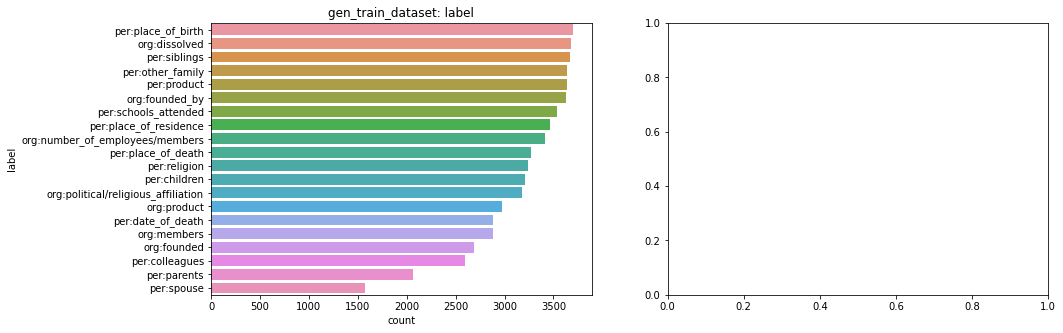

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(y=final_df['label'], ax=ax[0], order = final_df['label'].value_counts().index).set_title("gen_train_dataset: label")

In [79]:
final_df['label'].value_counts()

per:place_of_birth                     3704
org:dissolved                          3683
per:siblings                           3667
per:other_family                       3638
per:product                            3637
org:founded_by                         3624
per:schools_attended                   3536
per:place_of_residence                 3463
org:number_of_employees/members        3411
per:place_of_death                     3271
per:religion                           3235
per:children                           3213
org:political/religious_affiliation    3182
org:product                            2975
per:date_of_death                      2883
org:members                            2879
org:founded                            2687
per:colleagues                         2600
per:parents                            2065
per:spouse                             1573
Name: label, dtype: int64

In [80]:
gen_generated = pd.read_csv("/opt/ml/temp_dataset/generated_dataset.csv", index_col = 0, encoding='utf-8')


In [84]:
최종_gen_df = pd.concat([final_df,gen_generated], ignore_index=True)

In [85]:
최종_gen_df

,id,label,object_entity,object_idx,object_type,sentence,subject_entity,subject_idx,subject_type
0,0,per:spouse,문재인,"[58, 60]",PER,"김정숙은 첫 부인과의 사이에 장녀 박병숙을 두었고, 두 번째 부인은 경희대학교 교수...",김정숙,"[0, 3]",PER
1,1,per:spouse,엘레나 차우셰스쿠,"[67, 69]",PER,엘레나 차우셰스쿠 회장이 수감 중 구치소에 라텍스 베개를 배포하였다거나 이혼 소송,니콜라에 차우셰스쿠,"[110, 112]",PER
2,2,per:spouse,강주은,"[13, 21]",PER,최민수는 이후 강주은을 생명의 은인으로,최민수,"[0, 7]",PER
3,3,per:spouse,고소영,"[3, 5]",PER,고소영(35) 씨와 남편 장동건,장동건,"[17, 19]",PER
4,4,per:spouse,한인하,"[11, 13]",PER,박흥식 대통령 부인 한인하,박흥식,"[0, 2]",PER
...,...,...,...,...,...,...,...,...,...
109598,53186,per:title,골키퍼,"[0, 2]",POH,골키퍼 이광연 선수는 현재 이광연 선수는 강원도에서 진행하고 있는 2020 FIFA...,이광연,"[4, 6]",PER
109599,53187,per:employee_of,YG 엔터테인먼트,"[4, 12]",ORG,킵식스 YG 엔터테인먼트가 한국 프로야구에 진출한 지 5년 만에 한국 프로야구 역사...,킵식스,"[0, 2]",PER
109600,53188,per:title,보건복지부장관,"[0, 6]",POH,보건복지부장관 박능후)는 6월 1일(금) 국무회의에서 「아동학대 방지대책」을 보고하...,박능후,"[8, 10]",PER
109601,53189,no_relation,알렉산드라,"[0, 4]",PER,알렉산드라은 알렉산드르 3세를 계승하였다. 그러자 유럽의 강대국들은 모두 알렉산드르...,알렉산드르 3세,"[7, 14]",PER


In [86]:
최종_gen_df['label'].value_counts()

no_relation                            11149
org:top_members/employees               4994
per:employee_of                         4175
per:place_of_birth                      3997
per:other_family                        3983
org:founded_by                          3909
per:siblings                            3897
per:product                             3884
org:dissolved                           3804
per:place_of_residence                  3787
per:children                            3746
per:title                               3681
per:schools_attended                    3674
org:product                             3640
org:members                             3597
per:date_of_death                       3588
per:colleagues                          3538
org:number_of_employees/members         3496
org:founded                             3472
per:religion                            3402
org:political/religious_affiliation     3359
per:place_of_death                      3339
org:member

Text(0.5, 1.0, 'gen_train_dataset: label')

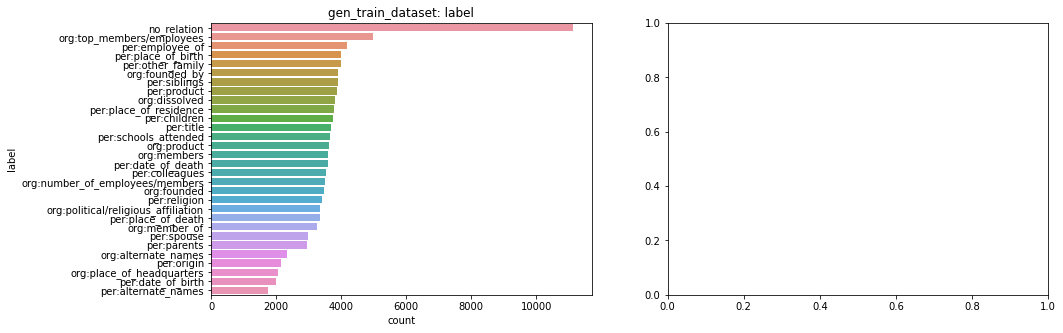

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(y=최종_gen_df['label'], ax=ax[0], order = 최종_gen_df['label'].value_counts().index).set_title("gen_train_dataset: label")

Text(0.5, 1.0, 'gen_train_dataset: label')

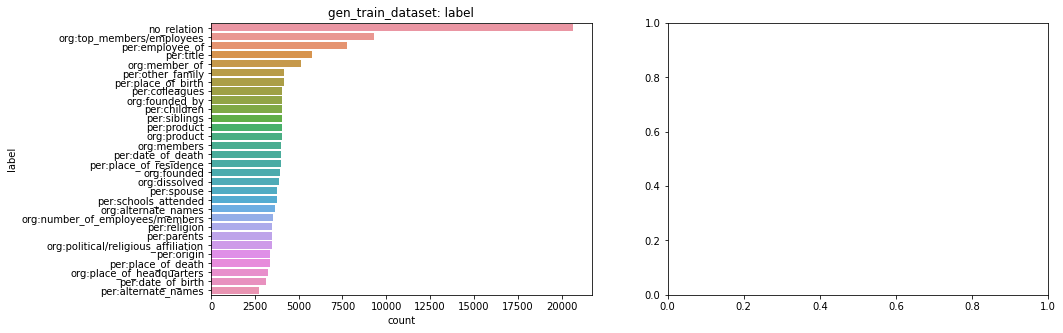

In [88]:
최종_df = pd.concat([최종_gen_df,df_vanila_temp], ignore_index=True)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(y=최종_df['label'], ax=ax[0], order = 최종_df['label'].value_counts().index).set_title("gen_train_dataset: label")

In [89]:
최종_df['label'].value_counts()

no_relation                            20679
org:top_members/employees               9278
per:employee_of                         7748
per:title                               5784
org:member_of                           5120
per:other_family                        4173
per:place_of_birth                      4163
per:colleagues                          4072
org:founded_by                          4064
per:children                            4050
per:siblings                            4033
per:product                             4023
org:product                             4020
org:members                             4016
per:date_of_death                       4006
per:place_of_residence                  3979
org:founded                             3922
org:dissolved                           3870
per:spouse                              3782
per:schools_attended                    3756
org:alternate_names                     3658
org:number_of_employees/members         3544
per:religi